In [1]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
from numpy import mean,std

In [2]:
X, y = make_classification(n_samples=1000,n_features=20, n_informative=15, n_redundant=5, random_state=2)

In [3]:
def get_voting(number_of_ensembles):
    models=list()
    for i in range(1,2*number_of_ensembles,2):
        models.append(('knn'+str(i),KNeighborsClassifier(n_neighbors=i)))
    
    ensemble = VotingClassifier(estimators=models,voting='hard')
    return ensemble

In [4]:
# get a list of models to evaluate
def get_models(number_of_ensembles):
    models = dict()
    for i in range(1,2*number_of_ensembles,2):
         models['knn'+str(i)] = KNeighborsClassifier(n_neighbors=i)
    models['hard_voting'] = get_voting(number_of_ensembles)
    return models

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X,y):
     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
     scores = cross_val_score(model, X,y,scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
     return scores
    

>knn1 0.873 (0.030)
>knn3 0.889 (0.038)
>knn5 0.895 (0.031)
>knn7 0.899 (0.035)
>knn9 0.900 (0.033)
>knn11 0.897 (0.027)
>knn13 0.896 (0.026)
>knn15 0.894 (0.031)
>knn17 0.887 (0.031)
>knn19 0.884 (0.032)
>hard_voting 0.899 (0.029)


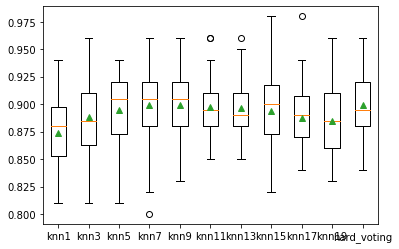

In [9]:
models = get_models(10)
results, names = list(),list()

for name,model in models.items():
    scores= evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
    